## Back Propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train data (XOR Problem) = eXclusive OR Problem
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

In [3]:
print('w1 :', np.random.randn(2,2))
print('w2 :', np.random.randn(1,2))

w1 : [[ 0.80732906 -0.68567596]
 [ 0.15590709 -0.49771381]]
w2 : [[-0.10783535  1.04962079]]


In [4]:
# initialization
np.random.seed(2022)

# input - hidden layer
w1 = np.random.randn(2,2)
b1 = np.random.randn(1,2)

# hidden - output layer
w2 = np.random.randn(1,2)
b2 = np.random.randn(1)

# epoch
ep = 30000

# learning rate
lr = 1
mse = []

In [6]:
print('전체 샘플에 대한 반복 학습 횟수: ', ep)
# w11, w12, w21, w22, b1, b2
print('첫 번째 층 가중치 및 편향: \n', w1, '\n',b1)
# w31, w32, b3
print('두 번째 층 가중치 및 편향: \n', w2, '\n',b2)

전체 샘플에 대한 반복 학습 횟수:  30000
첫 번째 층 가중치 및 편향: 
 [[-5.27899086e-04 -2.74901425e-01]
 [-1.39285562e-01  1.98468616e+00]] 
 [[0.28210933 0.76080866]]
두 번째 층 가중치 및 편향: 
 [[0.30098161 0.54029727]] 
 [0.37349729]


In [7]:
1 / (1 + np.exp(-(np.sum(x[0] * w1[0]) + b1[0][0])))

0.5700632772129338

In [9]:
x[0], w1[0], b1[0][0]

(array([0, 0]), array([-0.0005279 , -0.27490142]), 0.2821093257715091)

In [10]:
# Neural Network 2-2-1
for i in range(ep):
    E, result = np.array([]), np.array([])

    for j in range(len(x)):
        Ha = np.array([])

        # Feed Forward
        # Input - Hidden layer
        for k in range(len(w1)):
            Ha = np.append(Ha, 1 / (1 + np.exp(-(np.sum(x[j] * w1[k]) + b1[0][k]))))
        
        # Hidden - Output layer
        Hb = 1 / (1 + np.exp(-(np.sum(Ha * w2) + b2)))
        result = np.append(result, Hb)

        # Error
        E = np.append(E, y[j] - Hb)

        # Back-Propagation
        # Output - Hidden layer
        alpha_2 = E[j] * Hb * (1-Hb)

        # Hidden - Input Layer
        alpha_1 = alpha_2 * Ha * (1-Ha) * w2

        # update
        w2 = w2 + lr * alpha_2 * Ha
        b2 = b2 + lr * alpha_2

        w1 = w1 + np.ones((2,2)) * lr * alpha_1 * x[j]
        b1 = b1 + lr * alpha_1

    if i % 1000 == 0:    
        print('Epoch: %05d MSE: %04f Results: 0 0 => %04f 0 1 => %04f 1 0 => %04f 1 1 => %04f'
              %(i, np.mean(E**2), result[0], result[1], result[2], result[3]))   
    mse.append(np.mean(E**2))

# w11, w12, w21, w22, b1, b2
print('업데이트 된 첫 번째 층 가중치 및 편향: \n', w1, '\n',b1)
# w31, w32, b3
print('업데이트 된 두 번째 층 가중치 및 편향: \n', w2, '\n',b2)
# Ha = [x1 * w11 + x2 * w 21 + b1, x1 * w12 + x2 * w22 + b2] → 입력값과 가중치의 곱 + 편향 (가중합)의 시그모이드를 취한 형태
# Hb = 은닉층 노드의 출력값과 가중치의 곱 + 편향 (가중합)에 시그모이드를 취하는 형태
print('두번째 층 편미분 값(Output - Hidden):', alpha_2)
print('첫번째 층 편미분 값(Hidden - Input):', alpha_1)
print('예측치와 실제값의 차이:', E)

Epoch: 00000 MSE: 0.313580 Results: 0 0 => 0.713676 0 1 => 0.679236 1 0 => 0.683284 1 1 => 0.736062
Epoch: 01000 MSE: 0.031011 Results: 0 0 => 0.234844 0 1 => 0.806471 1 0 => 0.840670 1 1 => 0.077806
Epoch: 02000 MSE: 0.004609 Results: 0 0 => 0.092626 0 1 => 0.927843 1 0 => 0.934087 1 1 => 0.017508
Epoch: 03000 MSE: 0.002607 Results: 0 0 => 0.069890 0 1 => 0.946316 1 0 => 0.949595 1 1 => 0.010963
Epoch: 04000 MSE: 0.001921 Results: 0 0 => 0.060074 0 1 => 0.954356 1 0 => 0.956193 1 1 => 0.008423
Epoch: 05000 MSE: 0.001603 Results: 0 0 => 0.054917 0 1 => 0.958721 1 0 => 0.959503 1 1 => 0.007140
Epoch: 06000 MSE: 0.001456 Results: 0 0 => 0.052352 0 1 => 0.961122 1 0 => 0.960909 1 1 => 0.006483
Epoch: 07000 MSE: 0.001431 Results: 0 0 => 0.051902 0 1 => 0.962036 1 0 => 0.960649 1 1 => 0.006292
Epoch: 08000 MSE: 0.001566 Results: 0 0 => 0.054277 0 1 => 0.961157 1 0 => 0.957985 1 1 => 0.006723
Epoch: 09000 MSE: 0.002197 Results: 0 0 => 0.064168 0 1 => 0.955921 1 0 => 0.948560 1 1 => 0.009115


In [11]:
# 검증
for j in range(len(x)):
    Ha = np.array([])

    # Feed Forward
    # Input - Hidden Layer
    for k in range(len(w1)):
        Ha = np.append(Ha, 1 / (1 + np.exp(-(np.sum(x[j] * w1[k]) + b1[0][k]))))

    # Hidden - Output Layer
    Hb = 1 / (1 + np.exp(-(np.sum(Ha * w2) + b2)))
    print(x[j], Hb[0])

[0 0] 0.030044465011329166
[0 1] 0.9813362172279351
[1 0] 0.974150473363246
[1 1] 0.009272082156487817


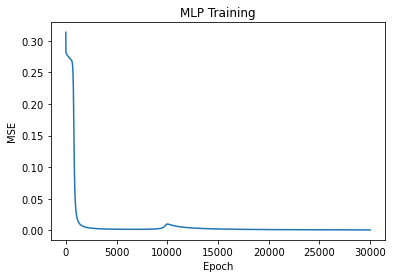

In [12]:
# MSE
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MLP Training')
plt.plot(mse)
plt.show()